# Project Description:
In this particular project, we are using a dataset that contains information like
quality category, citric acid quantity, chlorides density etc and using it to predict
red wine quality.
However, before you go ahead and make a prediction, it is advised that you first
pre-process the data, since it may contain some irregularities and noise.
In addition, try various tricks and techniques in order to gain the best accuracy
in your predictions.


## Data Exploration and Pre-processing

In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing data
df = pd.read_csv('winequalityN.csv')

# Fill null value using Mean
fmean_value=df['fixedacidity'].mean()
vmean_value=df['volatileacidity'].mean()
cmean_value=df['citricacid'].mean()
rmean_value=df['residualsugar'].mean()
chmean_value=df['chlorides'].mean()
pmean_value=df['pH'].mean()
smean_value=df['sulphates'].mean()

df.fixedacidity.fillna(value=fmean_value,inplace=True)
df.volatileacidity.fillna(value=vmean_value,inplace=True)
df.citricacid.fillna(value=cmean_value,inplace=True)
df.residualsugar.fillna(value=rmean_value,inplace=True)
df.chlorides.fillna(value=chmean_value,inplace=True)
df.pH.fillna(value=pmean_value,inplace=True)
df.sulphates.fillna(value=smean_value,inplace=True)

# df['fixedacidity'].fillna(value=mean_value,inplace=True)

df.dtypes

type                   object
fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [4]:
df.head()

,type,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# coverting categorical value to numerical
stp_cvt = [1,0]
stp_lst = ['white','red']
stp_lst.sort()
print(stp_lst)

['red', 'white']


In [6]:
for i,j in zip(stp_lst, stp_cvt):
    df['type'].replace(i,j,inplace=True)

In [7]:
df.head(5)

,type,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df.shape
df.dtypes

type                    int64
fixedacidity          float64
volatileacidity       float64
citricacid            float64
residualsugar         float64
chlorides             float64
freesulfurdioxide     float64
totalsulfurdioxide    float64
density               float64
pH                    float64
sulphates             float64
alcohol               float64
quality                 int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                6497 non-null   int64  
 1   fixedacidity        6497 non-null   float64
 2   volatileacidity     6497 non-null   float64
 3   citricacid          6497 non-null   float64
 4   residualsugar       6497 non-null   float64
 5   chlorides           6497 non-null   float64
 6   freesulfurdioxide   6497 non-null   float64
 7   totalsulfurdioxide  6497 non-null   float64
 8   density             6497 non-null   float64
 9   pH                  6497 non-null   float64
 10  sulphates           6497 non-null   float64
 11  alcohol             6497 non-null   float64
 12  quality             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
df.isnull().sum()

type                  0
fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [11]:
df.describe()

,type,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,0.430779,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
df.type.unique()

array([0, 1], dtype=int64)

In [13]:
df.columns

Index(['type', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='chlorides', ylabel='alcohol'>

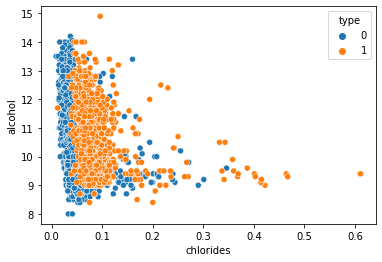

In [14]:
sns.scatterplot(df.chlorides,df.alcohol,hue=df.type)

<AxesSubplot:xlabel='alcohol', ylabel='citricacid'>

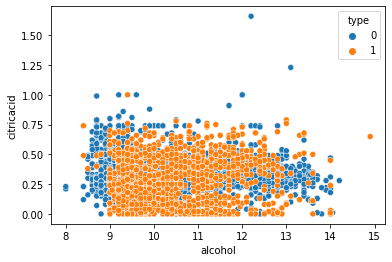

In [15]:
sns.scatterplot(df.alcohol,df.citricacid,hue=df.type)

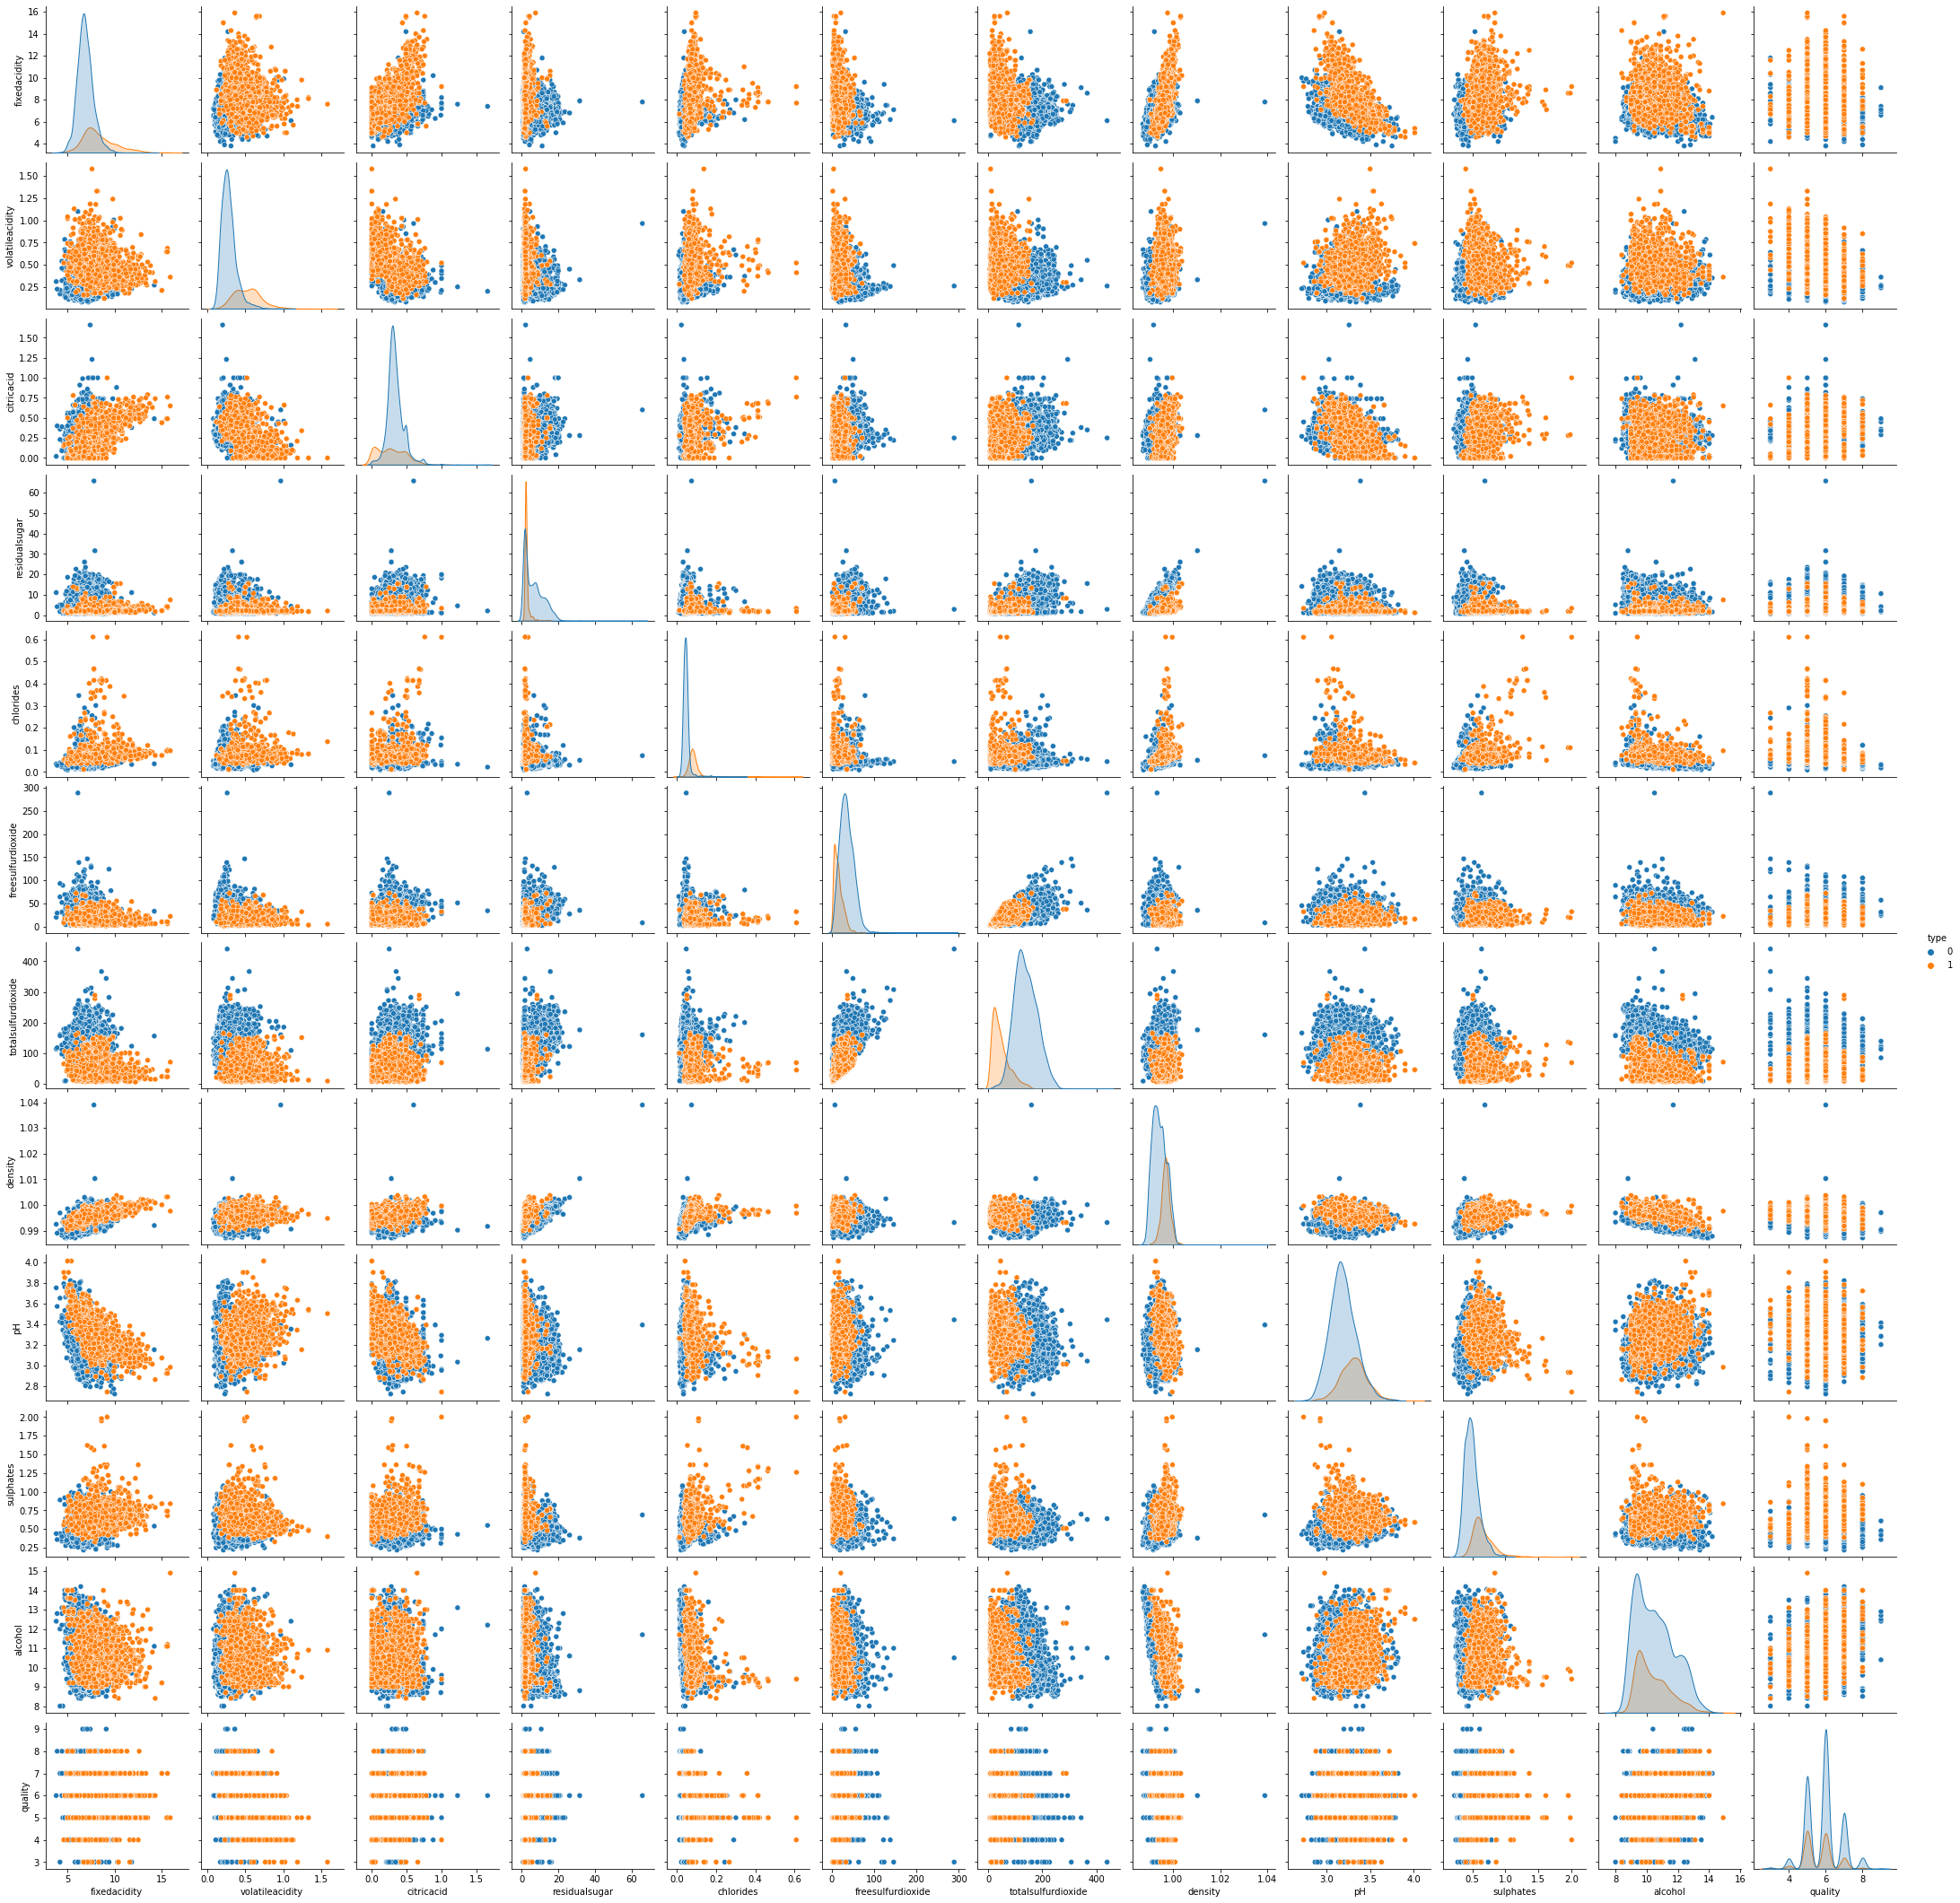

In [16]:
sns.pairplot(df,hue='type')

<AxesSubplot:xlabel='density', ylabel='residualsugar'>

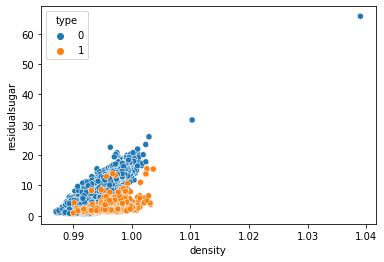

In [17]:
sns.scatterplot(df.density,df.residualsugar,hue=df.type)

<AxesSubplot:>

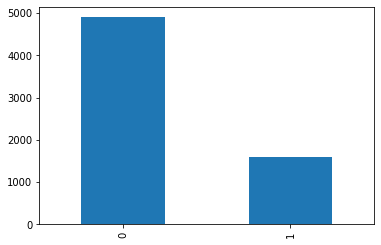

In [18]:
df['type'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'fixedacidity'}>,
        <AxesSubplot:title={'center':'volatileacidity'}>,
        <AxesSubplot:title={'center':'citricacid'}>],
       [<AxesSubplot:title={'center':'residualsugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'freesulfurdioxide'}>,
        <AxesSubplot:title={'center':'totalsulfurdioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

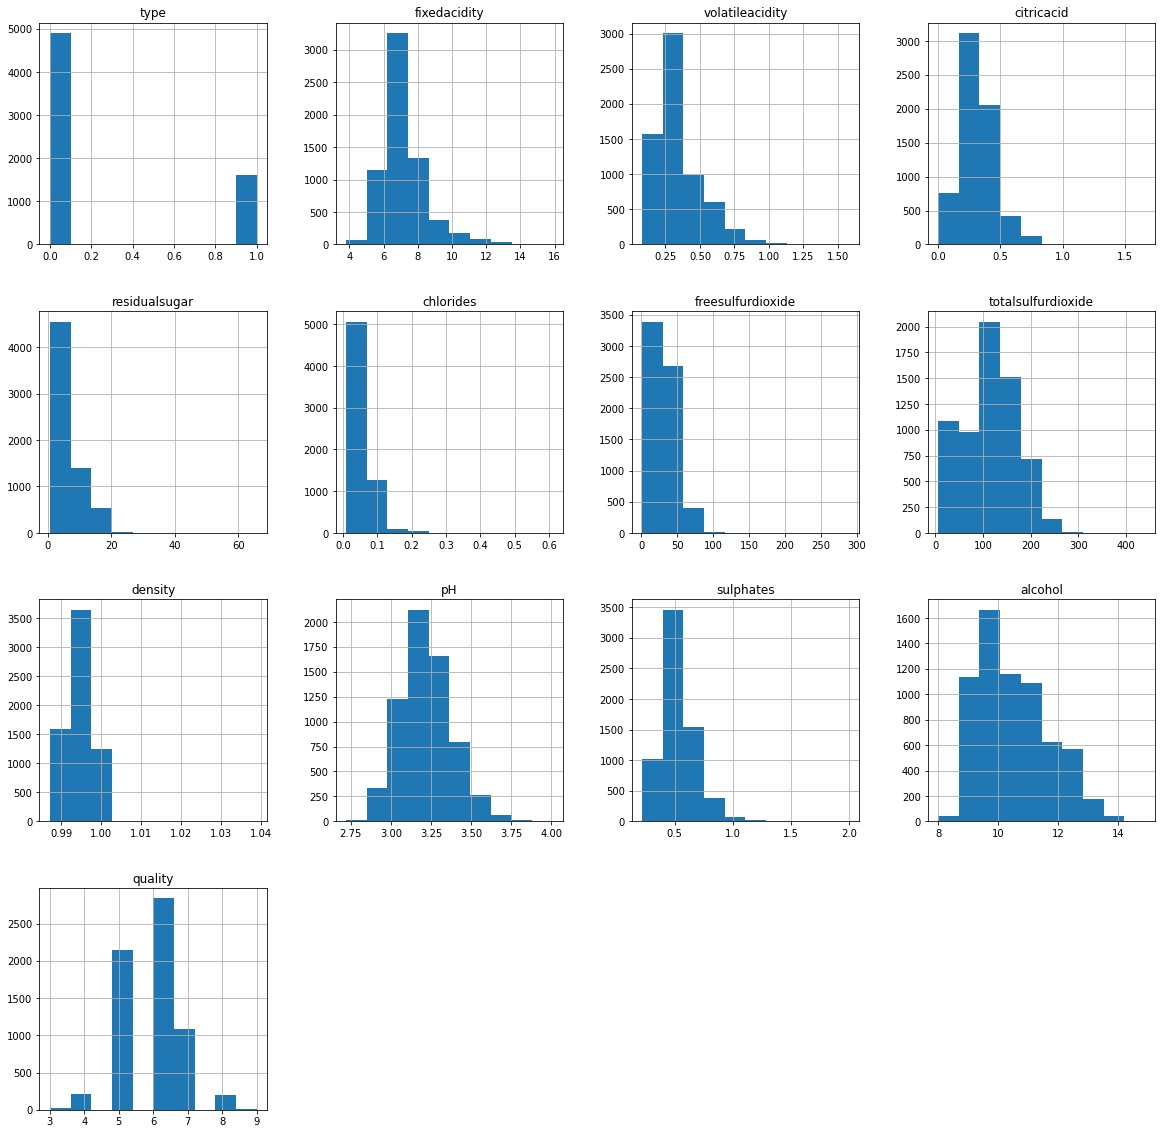

In [19]:
df.hist(figsize=(20,20))

# Spliting the dataset into Train Test and validation
- 60% Train data
- 20% validation data
- 20% test data

In [20]:
# Import modules for spliting data
from sklearn.model_selection import train_test_split

In [21]:
# drop tanget column
x = df.drop('type',axis=1)

In [22]:
x.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
y = df['type']

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [26]:
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5)

In [27]:
x_test.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
2559,5.7,0.255,0.65,1.2,0.079,17.0,137.0,0.99307,3.20,0.42,9.4,5
4025,6.2,0.320,0.45,2.9,0.029,37.0,94.0,0.98998,3.25,0.60,12.4,6
4294,7.4,0.220,0.28,9.0,0.046,22.0,121.0,0.99468,3.10,0.55,10.8,5
3878,6.5,0.350,0.31,10.2,0.069,58.0,170.0,0.99692,3.18,0.49,9.4,5
3621,7.1,0.270,0.24,12.6,0.044,48.0,118.0,0.99726,3.04,0.56,10.0,7


In [28]:
x_val.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
848,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7
6148,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9,6
1519,8.3,0.20,0.49,1.7,0.040,34.0,169.0,0.99380,3.05,0.37,10.1,5
1222,7.6,0.28,0.39,1.2,0.038,21.0,115.0,0.99400,3.16,0.67,10.0,6
850,6.9,0.19,0.35,1.7,0.036,33.0,101.0,0.99315,3.21,0.54,10.8,7


In [29]:
x_train.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
844,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8
3440,6.8,0.17,0.32,1.4,0.040,35.0,106.0,0.99026,3.16,0.66,12.0,5
4942,6.8,0.67,0.02,1.8,0.050,5.0,11.0,0.99620,3.48,0.52,9.5,5
1350,8.0,0.57,0.39,3.9,0.034,22.0,122.0,0.99170,3.29,0.67,12.8,7
4385,6.4,0.26,0.21,8.2,0.050,51.0,182.0,0.99542,3.23,0.48,9.5,5


In [30]:
# Print Data
for dataset in [x_train,x_test,x_val]:
    print(len(dataset)/len(y))

0.5999692165614899
0.19993843312297985
0.20009235031553024


In [31]:
import numpy as np

print(np.mean(x_train))

fixedacidity            7.219873
volatileacidity         0.340332
citricacid              0.316852
residualsugar           5.461312
chlorides               0.056512
freesulfurdioxide      30.460108
totalsulfurdioxide    114.912391
density                 0.994720
pH                      3.222229
sulphates               0.533246
alcohol                10.499579
quality                 5.821960
dtype: float64


In [32]:
# Print Data
for dataset in [y_train,y_test,y_val]:
    print(len(dataset))

3898
1299
1300


In [33]:
x_train.to_csv('train_features.csv',index=False)
y_train.to_csv('train_label.csv',index=False)
x_test.to_csv('test_features.csv',index=False)
y_test.to_csv('test_label.csv',index=False)
x_val.to_csv('val_features.csv',index=False)
y_val.to_csv('val_label.csv',index=False)